# Features Information:

## People

**ID**: Customer's unique identifier

**Year_Birth**: Customer's birth year

**Education**: Customer's education level

**Marital_Status**: Customer's marital status

**Income**: Customer's yearly household income

**Kidhome**: Number of children in customer's household

**Teenhome**: Number of teenagers in customer's household

**Dt_Customer**: Date of customer's enrollment with the company

**Recency**: Number of days since customer's last purchase

**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise


## Products

**MntWines**: Amount spent on wine in last 2 years

**MntFruits**: Amount spent on fruits in last 2 years

**MntMeatProducts**: Amount spent on meat in last 2 years

**MntFishProducts**: Amount spent on fish in last 2 years

**MntSweetProducts**: Amount spent on sweets in last 2 years

**MntGoldProds**: Amount spent on gold in last 2 years


## Promotion

**NumDealsPurchases**: Number of purchases made with a discount

**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

**NumDealsPurchases**: Number of purchases made through the company’s website

**NumCatalogPurchases**: Number of purchases made using a catalogue

**NumStorePurchases**: Number of purchases made directly in stores

**NumWebVisitsMonth**: Number of visits to company’s website in the last month



# Importing libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.imputation import MeanMedianImputer
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
import scipy.stats as stats
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.outliers import OutlierTrimmer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from feature_engine.encoding import CountFrequencyEncoder
import geopy.distance
from geopy.distance import geodesic
import math
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from feature_engine.outliers import OutlierTrimmer
%matplotlib inline

#  Load and  understand data

In [69]:
# Loading the dataset
data=pd.read_csv("marketing_campaign.csv",delimiter="\t")

In [3]:
# shows all columns
pd.set_option("display.max_columns",None)

In [4]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [6]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Statistical Summary

In [8]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Cleaning and manipulation steps

In [5]:
#Drop ID Columns which won't be use for building model

data.drop("ID",axis=1,inplace=True)

In [6]:
data.duplicated().sum()

182

In [7]:
## drop duplicate values
data.drop_duplicates(inplace=True)

In [8]:
data=data.reset_index(drop=True)

In [9]:
## drop constant feature which has has only one unique value
data.drop(["Z_CostContact",'Z_Revenue'],axis=1,inplace=True)

In [10]:
## add children column from kidhome and teenhome columns
data['Children']=data['Kidhome']+data['Teenhome']

In [71]:
## after create  children column drop kidhome and teenhome columns
data.drop(["Teenhome",'Kidhome'],axis=1,inplace=True)

In [70]:
## Combining different type of spendings to single one
data['Total_spending']=data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [13]:
## Extract the "Age" of a customer by the "Year_Birth" feature
data['Age']=2023-data['Year_Birth']

# EDA

### 1. Does age group affect spending of customers?

In [14]:
cut_labels_Age = ['Young', 'Adult', 'Senior']
cut_bins = [0, 45, 60, 120]

In [15]:
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)

In [16]:
data['Age_group'].value_counts()

Adult     906
Senior    642
Young     507
Name: Age_group, dtype: int64

In [17]:
mean_spending_by_age = data.groupby('Age_group').mean()['Total_spending']

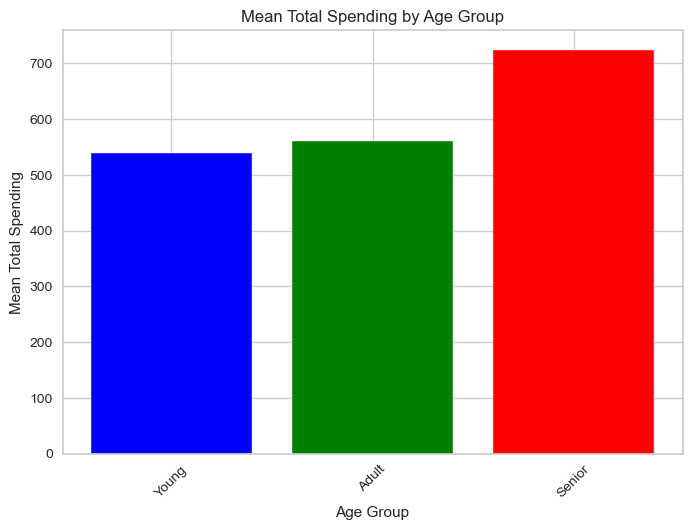

In [18]:
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plotting the mean total spending with different colors
plt.bar(mean_spending_by_age.index, mean_spending_by_age, color=colors)
plt.xlabel('Age Group')
plt.ylabel('Mean Total Spending')
plt.title('Mean Total Spending by Age Group')
plt.xticks(rotation=45)
plt.show()

In [19]:
### this barplot shows that senior people spend more money than other age groups

### 2. Distribution of spending money based on product types

In [20]:
data['MntWines'].sum()/data['Total_spending'].sum()

0.5013220929384448

In [21]:
data['MntFruits'].sum()/data['Total_spending'].sum()

0.04327439820525583

In [22]:
data['MntMeatProducts'].sum()/data['Total_spending'].sum()

0.2766304143092215

In [23]:
data['MntSweetProducts'].sum()/data['Total_spending'].sum()

0.044828528673667066

In [24]:
data['MntFishProducts'].sum()/data['Total_spending'].sum()

0.061575306397743584

In [25]:
data['MntGoldProds'].sum()/data['Total_spending'].sum()

0.07236925947566732

In [26]:
### we see that people spend their money to wine, wine involve 50 percent of total spendings, and fruits,sweets in last options

### 3. Number of children in family how to affect total spendings?

In [27]:
mean_spending_by_number_of_children=data.groupby('Children').mean()['Total_spending']

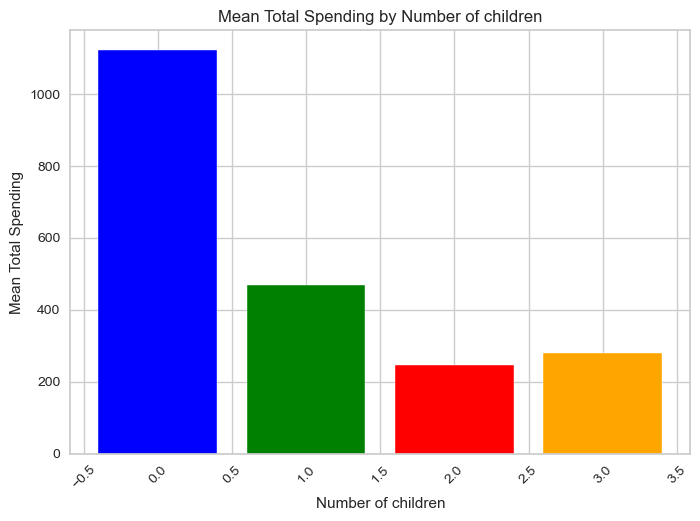

In [28]:
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plotting the mean total spending with different colors
plt.bar(mean_spending_by_number_of_children.index, mean_spending_by_number_of_children, color=colors)
plt.xlabel('Number of children')
plt.ylabel('Mean Total Spending')
plt.title('Mean Total Spending by Number of children')
plt.xticks(rotation=45)
plt.show()

In [29]:
## surprisingly we show that customers who has no children spend more money

### 4. Does marital status affects total spendings?

In [30]:
mean_spending_by_marital_status=data.groupby('Marital_Status').mean()['Total_spending']

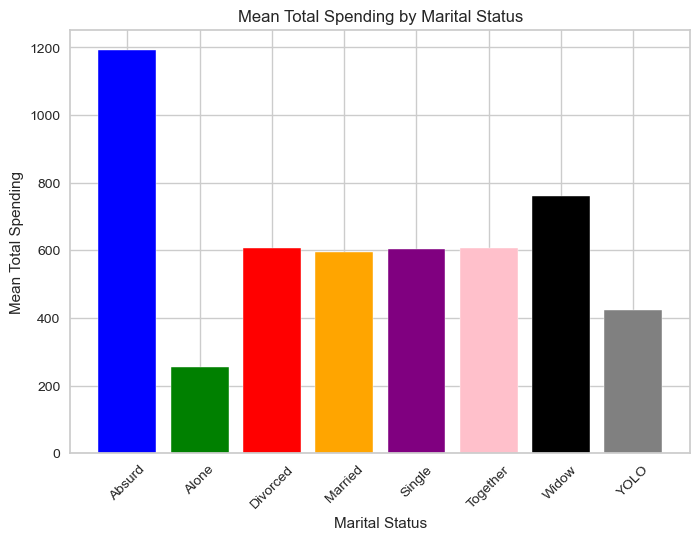

In [31]:
colors = ['blue', 'green', 'red', 'orange', 'purple','pink',"black","grey"]

# Plotting the mean total spending with different colors
plt.bar(mean_spending_by_marital_status.index, mean_spending_by_marital_status, color=colors)
plt.xlabel('Marital Status')
plt.ylabel('Mean Total Spending')
plt.title('Mean Total Spending by Marital Status')
plt.xticks(rotation=45)
plt.show()

In [32]:
### this barplot shows that absurd marital status spend considerable amount of money than other categories

### After EDA drop unnecessary columns

In [33]:
## drop Year_Birth columns after create age feature
data.drop("Year_Birth",axis=1,inplace=True)

In [34]:
## drop different types of spending columns after creating total spending attribute
data.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1,inplace=True)

In [35]:
### create accepted campaign columns instead of regardless customers when accept campaign 
data["Accepted"]=data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['AcceptedCmp1']+data['AcceptedCmp2']+data['Response']

In [36]:
data['Accepted']=np.where(data['Accepted']>0,1,data['Accepted'])

In [37]:
### drop different levels of accepted campaign columns after creating accepted campaign feature
data.drop(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response'],axis=1,inplace=True)

In [38]:
## Total purchases on various type of purchases
data['Total_purchases']=data['NumDealsPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

In [39]:
data.drop(['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'],axis=1,inplace=True)

In [40]:
## drop redundant columns which are not used in modeling or create get some insights in EDA
data.drop(["Dt_Customer",'Age_group'],axis=1,inplace=True)

# Impute missing values

In [41]:
data.isnull().sum()

Education             0
Marital_Status        0
Income               24
Recency               0
NumWebVisitsMonth     0
Complain              0
Children              0
Total_spending        0
Age                   0
Accepted              0
Total_purchases       0
dtype: int64

In [42]:
## There are missing values in income column

In [43]:
data['Income'].fillna(data['Income'].median(),inplace=True)

In [111]:
## use median impute for filling missing values

# Encoding

In [44]:
## Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
data["Living_situation"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [45]:
data.drop("Marital_Status",axis=1,inplace=True)

In [46]:
## Create three categories in the "Education" by simplifying its value counts.
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [47]:
## encode Education column with ordinal encoding
ordinal_mapping = {k: i
                   for i, k in enumerate(data['Education'].value_counts().index)
                  }
ordinal_mapping

{'Graduate': 0, 'Postgraduate': 1, 'Undergraduate': 2}

In [48]:
ordinal_mapping['Undergraduate']=0
ordinal_mapping['Graduate']=1
ordinal_mapping['Postgraduate']=2

ordinal_mapping

{'Graduate': 1, 'Postgraduate': 2, 'Undergraduate': 0}

In [49]:
data['Education']=data['Education'].map(ordinal_mapping)

In [50]:
## Use one hot encoder method to encode Living_situation attribute
ohe_enc = OneHotEncoder(variables='Living_situation',
                        drop_last=True)

In [51]:
data=ohe_enc.fit_transform(data)

# Outlier removing  

In [52]:
trimmer_iqr=OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5,variables=['Income','NumWebVisitsMonth','Total_spending','Age','Total_purchases'])

In [53]:
data=trimmer_iqr.fit_transform(data)

In [54]:
data.reset_index(drop=True)

,Education,Income,Recency,NumWebVisitsMonth,Complain,Children,Total_spending,Age,Accepted,Total_purchases,Living_situation_Alone
0,1,58138.0,58,7,0,0,1617,66,1,25,1
1,1,46344.0,38,5,0,2,27,69,0,6,1
2,1,71613.0,26,4,0,0,776,58,0,21,0
3,1,26646.0,26,6,0,1,53,39,0,8,0
4,2,58293.0,94,5,0,1,422,42,0,19,0
...,...,...,...,...,...,...,...,...,...,...,...
2030,1,26816.0,50,4,0,0,22,37,0,4,1
2031,1,61223.0,46,5,0,1,1341,56,0,18,0
2032,1,56981.0,91,6,0,0,1241,42,1,19,1
2033,2,69245.0,8,3,0,1,843,67,0,23,0


# Remove collinear features

In [55]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Education,Income,Recency,NumWebVisitsMonth,Complain,Children,Total_spending,Age,Accepted,Total_purchases,Living_situation_Alone
Education,1.000000,0.154126,-0.007784,-0.063822,-0.039723,0.057776,0.091430,0.198799,0.062565,0.098873,-0.002632
Income,0.154126,1.000000,0.001843,-0.637949,-0.027681,-0.357810,0.821041,0.223639,0.291416,0.699379,0.013758
Recency,-0.007784,0.001843,1.000000,-0.019228,-0.001312,0.027234,0.017149,0.016834,-0.104706,0.004410,0.003502
NumWebVisitsMonth,-0.063822,-0.637949,-0.019228,1.000000,0.018640,0.439714,-0.501852,-0.136249,-0.061029,-0.304255,-0.011286
Complain,-0.039723,-0.027681,-0.001312,0.018640,1.000000,0.025851,-0.031666,-0.002204,-0.025866,-0.012736,0.001763
Children,0.057776,-0.357810,0.027234,0.439714,0.025851,1.000000,-0.505604,0.084178,-0.221224,-0.258581,-0.038035
Total_spending,0.091430,0.821041,0.017149,-0.501852,-0.031666,-0.505604,1.000000,0.134320,0.396625,0.753734,0.018782
Age,0.198799,0.223639,0.016834,-0.136249,-0.002204,0.084178,0.134320,1.000000,0.023679,0.193375,0.016831
Accepted,0.062565,0.291416,-0.104706,-0.061029,-0.025866,-0.221224,0.396625,0.023679,1.000000,0.254292,0.064343
Total_purchases,0.098873,0.699379,0.004410,-0.304255,-0.012736,-0.258581,0.753734,0.193375,0.254292,1.000000,-0.000800


In [56]:
## drop high collinear Income column
data.drop("Income",axis=1,inplace=True)

# Modeling

### K-means clustering

In [57]:
Within_Cluster_Sum_of_Squares = []
for k in range(1,11): 
    kmeans = KMeans(n_clusters=k, random_state= 42) 
    kmeans.fit(data)
    Within_Cluster_Sum_of_Squares.append(kmeans.inertia_)

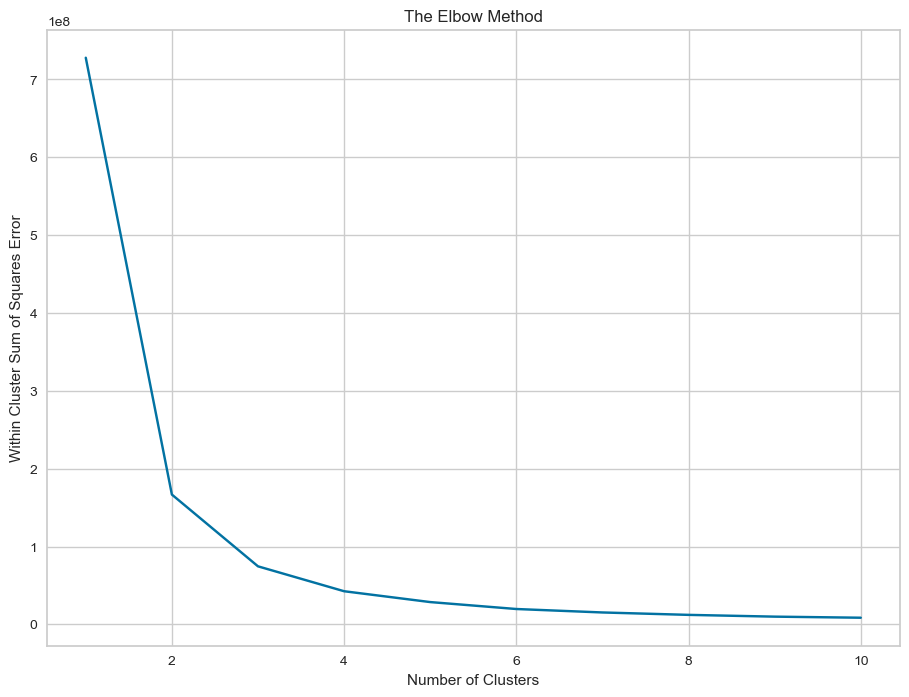

In [58]:
fig, axis = plt.subplots(figsize = (11,8))
sns.lineplot(x=range(1,11), y=Within_Cluster_Sum_of_Squares, ax = axis)
plt.title("The Elbow Method")
plt.ylabel("Within Cluster Sum of Squares Error")
plt.xlabel("Number of Clusters")
plt.show()

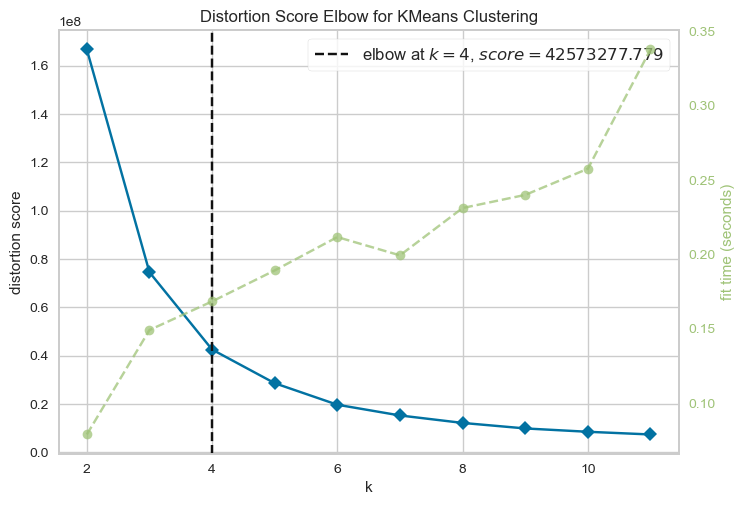

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(data)        
visualizer.show()

In [59]:
kmeans = KMeans(n_clusters=4)

In [60]:
kmeans_predictions = kmeans.fit_predict(data)

In [61]:
kmeans_predictions

array([3, 1, 2, ..., 0, 2, 1])

In [62]:
silhouette_score(data,kmeans_predictions )

0.6272851684661467

### DBSCAN clustering

In [63]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan_predictions = dbscan.fit_predict(data)

In [64]:
dbscan_predictions

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [65]:
silhouette_score(data,dbscan_predictions )

-0.5340925043067642

### Testing

In [66]:
data['class']=kmeans_predictions

In [67]:
data

,Education,Recency,NumWebVisitsMonth,Complain,Children,Total_spending,Age,Accepted,Total_purchases,Living_situation_Alone,class
0,1,58,7,0,0,1617,66,1,25,1,3
1,1,38,5,0,2,27,69,0,6,1,1
2,1,26,4,0,0,776,58,0,21,0,2
3,1,26,6,0,1,53,39,0,8,0,1
4,2,94,5,0,1,422,42,0,19,0,2
...,...,...,...,...,...,...,...,...,...,...,...
2052,1,50,4,0,0,22,37,0,4,1,1
2054,1,46,5,0,1,1341,56,0,18,0,0
2055,1,91,6,0,0,1241,42,1,19,1,0
2056,2,8,3,0,1,843,67,0,23,0,2


In [68]:
for i in data.columns:
        print('label:0', i, data[data['class']==0].describe().loc['mean'][i])
        print('label:1', i, data[data['class']==1].describe().loc['mean'][i])
        print('label:2', i, data[data['class']==2].describe().loc['mean'][i])
        print('label:3', i, data[data['class']==3].describe().loc['mean'][i])
        print('*'*100)

label:0 Education 1.2892156862745099
label:1 Education 1.2045454545454546
label:2 Education 1.3209876543209877
label:3 Education 1.3858267716535433
****************************************************************************************************
label:0 Recency 49.806372549019606
label:1 Recency 48.93595041322314
label:2 Recency 47.150617283950616
label:3 Recency 50.66535433070866
****************************************************************************************************
label:0 NumWebVisitsMonth 3.906862745098039
label:1 NumWebVisitsMonth 6.322314049586777
label:2 NumWebVisitsMonth 5.409876543209877
label:3 NumWebVisitsMonth 3.440944881889764
****************************************************************************************************
label:0 Complain 0.00980392156862745
label:1 Complain 0.010330578512396695
label:2 Complain 0.012345679012345678
label:3 Complain 0.0
****************************************************************************************************
